In [2]:
import urllib
import pandas as pd
import numpy as np
import tensorflow as tf

In [3]:
# get the data from the repo
urllib.request.urlretrieve("https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip","10_food_classes_all_data.zip")

('10_food_classes_all_data.zip', <http.client.HTTPMessage at 0x149c10fd010>)

In [4]:
# extract the zip
import zipfile
zip_ref = zipfile.ZipFile("./10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [6]:
# walkthrough the data
import os
for dirpath,dirnames,filenames in os.walk("./10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in ./10_food_classes_all_data
There are 10 directories and 0 images in ./10_food_classes_all_data\test
There are 0 directories and 250 images in ./10_food_classes_all_data\test\chicken_curry
There are 0 directories and 250 images in ./10_food_classes_all_data\test\chicken_wings
There are 0 directories and 250 images in ./10_food_classes_all_data\test\fried_rice
There are 0 directories and 250 images in ./10_food_classes_all_data\test\grilled_salmon
There are 0 directories and 250 images in ./10_food_classes_all_data\test\hamburger
There are 0 directories and 250 images in ./10_food_classes_all_data\test\ice_cream
There are 0 directories and 250 images in ./10_food_classes_all_data\test\pizza
There are 0 directories and 250 images in ./10_food_classes_all_data\test\ramen
There are 0 directories and 250 images in ./10_food_classes_all_data\test\steak
There are 0 directories and 250 images in ./10_food_classes_all_data\test\sushi
There are 10 directori

In [7]:
# Setup train and test data
train_dir = "./10_food_classes_all_data/train/"
test_dir = "./10_food_classes_all_data/test/"

In [9]:
# Get class names
import pathlib
data_dir = pathlib.Path(train_dir)
classnames = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(classnames)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [13]:
# another way to get classnames
classnames = np.array(sorted([ name for name in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, name)) ]))
classnames

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [22]:
# Visualize the data
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def view_random_image(dirname,classname):
    target_dir = os.path.join(dirname,classname)
    random_image = random.sample(os.listdir(target_dir),1)
    image_path = os.path.join(target_dir,random_image[0])
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis(False)
    plt.show()
    print(f"the shape of the image {img.shape}")
    print("image of " + classname)

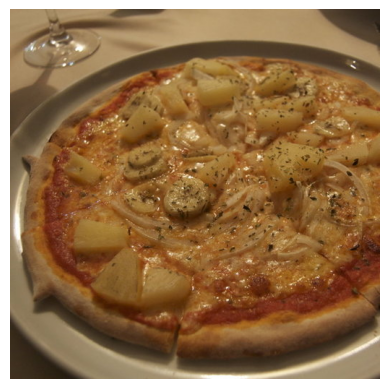

the shape of the image (512, 512, 3)
image of pizza


In [23]:
view_random_image(train_dir,'pizza')

In [33]:
# preprocessing the image for the model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# rescale the images
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data from directories and turn it into batches
train_data = train_datagen .flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(244,244),
                                                class_mode="categorical"
                                               )
test_data = test_datagen .flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(244,244),
                                                class_mode="categorical"
                                               )

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [34]:
# create a baseline model
import tensorflow as tf
baseline_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(244,244,3)),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=3),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax")])

# compile the model
baseline_model.compile(loss=tf.keras.losses.categorical_crossentropy,
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

# fit the model
baseline_history = baseline_model.fit(train_data,
                                      epochs=5,
                                     steps_per_epoch=len(train_data),
                                     validation_data=test_data,
                                     validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 157s 665ms/step - loss: 2.1912 - accuracy: 0.1867 - val_loss: 2.0957 - val_accuracy: 0.2304
Epoch 2/5
235/235 [==============================] - 142s 605ms/step - loss: 2.0360 - accuracy: 0.2725 - val_loss: 1.9797 - val_accuracy: 0.2884
Epoch 3/5
235/235 [==============================] - 147s 626ms/step - loss: 1.8378 - accuracy: 0.3623 - val_loss: 1.8642 - val_accuracy: 0.3508
Epoch 4/5
235/235 [==============================] - 144s 613ms/step - loss: 1.6600 - accuracy: 0.4339 - val_loss: 1.8132 - val_accuracy: 0.3644
Epoch 5/5
235/235 [==============================] - 144s 613ms/step - loss: 1.4648 - accuracy: 0.5069 - val_loss: 1.8542 - val_accuracy: 0.3620
